In [1]:
import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# Chapter 7: Esemble learing and random forests

In [2]:
# group of predictor is called ensemble, thus, this technique is called 
# ensemble learning, and an ensemble learning algorith is called a ensemble method.

# do read page->191

# For example, you can train a group of Decision Tree classifiers, each on a different
# random subset of the training set. To make predictions, you just obtain the predictions
# of all individual trees, then predict the class that gets the most votes (see the last
# exercise in Chapter 6). Such an ensemble of Decision Trees is called a Random Forest,
# and despite its simplicity, this is one of the most powerful Machine Learning algorithms
# available today.

## voting classifiers

In [3]:
# read upto page->194
# Ensemble methods work best when the predictors are as independent
# from one another as possible. One way to get diverse classifiers
# is to train them using very different algorithms. This increases the
# chance that they will make very different types of errors, improving
# the ensemble’s accuracy.

In [4]:
# data
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [5]:
# The following code creates and trains a voting classifier in Scikit-Learn, composed of
# three diverse classifiers

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", random_state=42)

voting_clf = VotingClassifier(
    estimators=[("lr", log_clf), ("rf", rnd_clf), ("svc", svm_clf)],
    voting="hard")
voting_clf.fit(X_train, y_train)

# voting = "hard"
# A very simple way to create an even better classifier is to aggregate the predictions of
# each classifier and predict the class that gets the most votes. This majority-vote classifier
# is called a hard voting classifier

# voting = "soft"
# If all classifiers are able to estimate class probabilities (i.e., they have a predict_proba() method), 
# then you can tell Scikit-Learn to predict the class with the
# highest class probability, averaged over all the individual classifiers. This is called soft
# voting.It often achieves higher performance than hard voting because it gives more
# weight to highly confident votes.

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [6]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [7]:
# now lets look at each classifier's accuracy on the test set:
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.912


In [8]:
# soft voting 

log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", probability=True, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(probability=True, random_state=42))],
                 voting='soft')

In [9]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.92


In [10]:
# do read page->194 really importand... 
# tells voting="hard", voting="soft"

## Bagging and pasting

In [19]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

svc_clf = SVC(C=1000,random_state=42, kernel="rbf", degree=2, gamma="scale")
svc_clf.fit(X_train, y_train)
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, random_state=42)
bag_clf.fit(X_train, y_train)

y_pred = bag_clf.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))
y_predict_svc = svc_clf.predict(X_test)
print(accuracy_score(y_test, y_predict_svc))

0.904
0.888


In [43]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))


0.856


In [57]:
# def plot_for_svc(clf, xmin, xmax):
#     x0 = np.linspace(xmin, xmax, 200)
#     w = clf.coef_[0]
#     b = clf.intercept_
#     decesion = decision_boundary = -w[0]/w[1] * x0 - b/w[1]
#     plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
#     plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
#     plt.plot(x0, decesion, 'k--')

def plot_predictions(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contour(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)
    

In [58]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

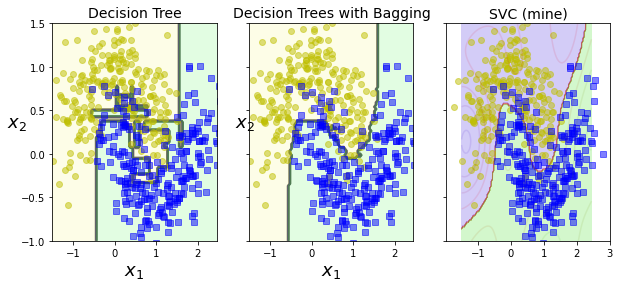

In [60]:
fig, axes = plt.subplots(ncols=3, figsize=(10,4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)
plt.sca(axes[1])
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Trees with Bagging", fontsize=14)
# plt.ylabel("")
plt.sca(axes[2])
plot_predictions(svc_clf, X, y)
plt.title("SVC (mine)", fontsize=14)
# save_fig("decision_tree_without_and_with_bagging_plot")
plt.show()

In [18]:
# One way to get a diverse set of classifiers is to use very different training algorithms,
# as just discussed. Another approach is to use the same training algorithm for every
# predictor, but to train them on different random subsets of the training set. When
# sampling is performed with replacement, this method is called bagging1 (short for
# bootstrap aggregating2). When sampling is performed without replacement, it is called
# pasting.

In [10]:
# n other words, both bagging and pasting allow training instances to be sampled several
# times across multiple predictors, but only bagging allows training instances to be
# sampled several times for the same predictor. This sampling and training process is
# represented in Figure 7-4.
# page->195

In [11]:
# Scikit-Learn offers a simple API for both bagging and pasting with the BaggingClas
# sifier class (or BaggingRegressor for regression). The following code trains an
# ensemble of 500 Decision Tree classifiers,5 each trained on 100 training instances randomly
# sampled from the training set with replacement (this is an example of bagging,
# but if you want to use pasting instead, just set bootstrap=False). The n_jobs parameter
# tells Scikit-Learn the number of CPU cores to use for training and predictions
# (–1 tells Scikit-Learn to use all available cores):

In [12]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
DecisionTreeClassifier(), n_estimators=500,
max_samples=100, bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

## out-of-bag evaluation

In [62]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    bootstrap=True, oob_score=True, random_state=40)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.8986666666666666

In [63]:
from sklearn.metrics import accuracy_score
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.912

In [13]:
# With bagging, some instances may be sampled several times for any given predictor,
# while others may not be sampled at all. By default a BaggingClassifier samples m
# training instances with replacement (bootstrap=True), where m is the size of the
# training set. This means that only about 63% of the training instances are sampled on
# average for each predictor.6 The remaining 37% of the training instances that are not
# sampled are called out-of-bag (oob) instances. Note that they are not the same 37%
# for all predictors.

In [15]:
bag_clf.oob_score_
# According to this oob evaluation, this BaggingClassifier is likely to achieve about
# 89% accuracy on the test set. Let’s verify this:

0.8986666666666666

In [16]:
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.912

In [17]:
# The oob decision function for each training instance is also available through the
# oob_decision_function_ variable. In this case (since the base estimator has a pre
# dict_proba() method) the decision function returns the class probabilities for each
# training instance. For example, the oob evaluation estimates that the first training
# instance has a 63.5% probability of belonging to the positive class (and 36.5% of
# belonging to the negative class):

bag_clf.oob_decision_function_[:5]

array([[0.31937173, 0.68062827],
       [0.31460674, 0.68539326],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ]])

## random patches and random subspaces

In [64]:
# just read the chapter from book cause there is a lot of theory involved
# this is ig important
# here it also randomly samples features also

## random forest

In [65]:
# As we have discussed, a Random Forest9 is an ensemble of Decision Trees, generally
# trained via the bagging method

# The following code trains a
# Random Forest classifier with 500 trees (each limited to maximum 16 nodes), using
# all available CPU cores:

from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16,
                                n_jobs=-1)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)


In [66]:
# The following BaggingClassifier is
# roughly equivalent to the previous RandomForestClassifier:
bag_clf = BaggingClassifier(
DecisionTreeClassifier(splitter="random", max_leaf_nodes=16),
n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1)

## Extra trees

In [21]:
# It is hard to tell in advance whether a RandomForestClassifier
# will perform better or worse than an ExtraTreesClassifier. Generally,
# the only way to know is to try both and compare them using
# cross-validation (and tuning the hyperparameters using grid
# search).

# page->200

# When you are growing a tree in a Random Forest, at each node only a random subset
# of the features is considered for splitting (as discussed earlier). It is possible to make
# trees even more random by also using random thresholds for each feature rather than
# searching for the best possible thresholds (like regular Decision Trees do).
# A forest of such extremely random trees is simply called an Extremely Randomized
# Trees ensemble12 (or Extra-Trees for short). Once again, this trades more bias for a
# lower variance. It also makes Extra-Trees much faster to train than regular Random
# Forests since finding the best possible threshold for each feature at every node is one
# of the most time-consuming tasks of growing a tree.
# You can create an Extra-Trees classifier using Scikit-Learn’s ExtraTreesClassifier
# class. Its API is identical to the RandomForestClassifier class. Similarly, the Extra
# TreesRegressor class has the same API as the RandomForestRegressor class.

## feature importance

In [82]:
# page->200 ig read it 
from sklearn.datasets import load_iris
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, random_state=42)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.11249225099876375
sepal width (cm) 0.02311928828251033
petal length (cm) 0.4410304643639577
petal width (cm) 0.4233579963547682


In [83]:
rnd_clf.feature_importances_
# Random Forests are very handy to get a quick understanding of what features
# actually matter, in particular if you need to perform feature selection.

array([0.11249225, 0.02311929, 0.44103046, 0.423358  ])

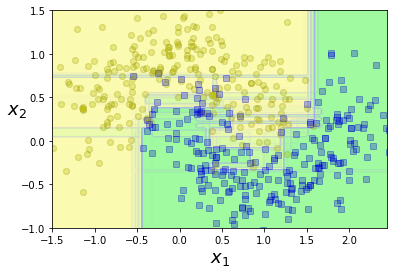

In [74]:
# The following figure overlays the decision boundaries of 15 decision trees. As you can see, even though each decision tree 
# is imperfect, the ensemble defines a pretty good decision boundary:

plt.figure(figsize=(6, 4))

for i in range(15):
    tree_clf = DecisionTreeClassifier(max_leaf_nodes=16, random_state=42 + i)
    indices_with_replacement = np.random.randint(0, len(X_train), len(X_train))
    tree_clf.fit(X_train[indices_with_replacement], y_train[indices_with_replacement])
    plot_decision_boundary(tree_clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.02, contour=False)

plt.show()

In [75]:
# **Warning:** since Scikit-Learn 0.24, `fetch_openml()` returns a Pandas `DataFrame` by default. To avoid this and 
# keep the same code as in the book, we use `as_frame=False`.

from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

In [76]:
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rnd_clf.fit(mnist["data"], mnist["target"])

RandomForestClassifier(random_state=42)

In [77]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.hot,
               interpolation="nearest")
    plt.axis("off")

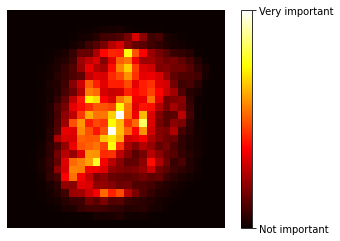

In [78]:
plot_digit(rnd_clf.feature_importances_)

cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(), rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])

# save_fig("mnist_feature_importance_plot")
plt.show()

## boosting

In [24]:
# Boosting (originally called hypothesis boosting) refers to any Ensemble method that
# can combine several weak learners into a strong learner.
# page->201

In [25]:
# The most popular one are AdaBoost and Gradient Boosting

## AdaBoost

In [26]:
# generally skipped the math part behind it.. 
# from page->203 to 205...

In [84]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200, random_state=42)

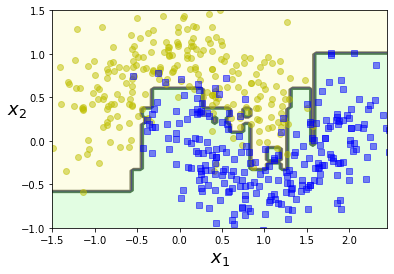

In [86]:
plot_decision_boundary(ada_clf, X, y)

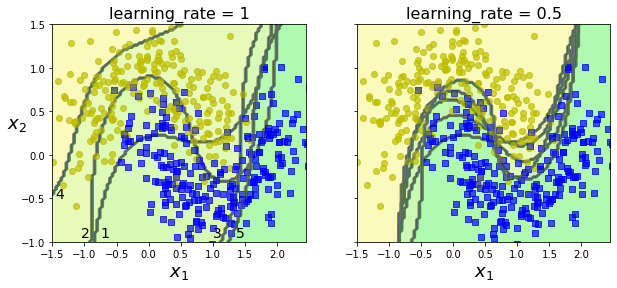

In [88]:
m = len(X_train)

fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)
for subplot, learning_rate in ((0, 1), (1, 0.5)):
    sample_weights = np.ones(m) / m
    plt.sca(axes[subplot])
    for i in range(5):
        svm_clf = SVC(kernel="rbf", C=0.2, gamma=0.6, random_state=42)
        svm_clf.fit(X_train, y_train, sample_weight=sample_weights * m)
        y_pred = svm_clf.predict(X_train)

        r = sample_weights[y_pred != y_train].sum() / sample_weights.sum() # equation 7-1
        alpha = learning_rate * np.log((1 - r) / r) # equation 7-2
        sample_weights[y_pred != y_train] *= np.exp(alpha) # equation 7-3
        sample_weights /= sample_weights.sum() # normalization step

        plot_decision_boundary(svm_clf, X, y, alpha=0.2)
        plt.title("learning_rate = {}".format(learning_rate), fontsize=16)
    if subplot == 0:
        plt.text(-0.75, -0.95, "1", fontsize=14)
        plt.text(-1.05, -0.95, "2", fontsize=14)
        plt.text(1.0, -0.95, "3", fontsize=14)
        plt.text(-1.45, -0.5, "4", fontsize=14)
        plt.text(1.36,  -0.95, "5", fontsize=14)
    else:
        plt.ylabel("")

# save_fig("boosting_plot")
plt.show()

## Gradient boosting